<a href="https://colab.research.google.com/github/Yngie-C/Is_this_book_in/blob/master/Perceptron_by_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XOR 문제 - 단층 퍼셉트론 구현하기

In [ ]:
import torch
import torch.nn as nn

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

torch.manual_seed(777)

if device == "cuda":
    torch.cuda.manual_seed_all(777)

In [ ]:
X = torch.FloatTensor([[0,0], [0,1], [1,0], [1,1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [ ]:
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid).to(device)

In [ ]:
criterion = nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [ ]:
for step in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0:
        print(step, cost.item())

0 0.7273974418640137
100 0.6931475400924683
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

In [ ]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()

    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[0.5]
 [0.5]
 [0.5]
 [0.5]]
모델의 예측값(Predicted):  [[0.]
 [0.]
 [0.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  0.5


# XOR 문제 - 다층 퍼셉트론 구현하기

In [22]:
import torch
import torch.nn as nn

In [14]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [15]:
X = torch.FloatTensor([[0,0], [0,1], [1,0], [1,1]]).to(device)
Y = torch.FloatTensor([[0], [1], [1], [0]]).to(device)

In [16]:
model = nn.Sequential(
    nn.Linear(2, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 10, bias=True),
    nn.Sigmoid(),
    nn.Linear(10, 1, bias=True),
    nn.Sigmoid()
).to(device)

In [17]:
criterion = torch.nn.BCELoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1)

In [18]:
for epoch in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(epoch, cost.item())

0 0.6948983669281006
100 0.6931558847427368
200 0.6931535005569458
300 0.6931514143943787
400 0.6931493282318115
500 0.6931473016738892
600 0.6931453943252563
700 0.6931434869766235
800 0.6931416988372803
900 0.6931397914886475
1000 0.6931380033493042
1100 0.6931361556053162
1200 0.6931343078613281
1300 0.6931324005126953
1400 0.6931304931640625
1500 0.6931284666061401
1600 0.6931264400482178
1700 0.6931242942810059
1800 0.6931220293045044
1900 0.6931196451187134
2000 0.6931171417236328
2100 0.6931145191192627
2200 0.6931116580963135
2300 0.6931085586547852
2400 0.6931051015853882
2500 0.6931014657020569
2600 0.6930974721908569
2700 0.6930930018424988
2800 0.6930880546569824
2900 0.6930825710296631
3000 0.6930763125419617
3100 0.6930692791938782
3200 0.6930612325668335
3300 0.6930519342422485
3400 0.6930411458015442
3500 0.693028450012207
3600 0.6930133104324341
3700 0.6929951906204224
3800 0.6929728984832764
3900 0.6929453015327454
4000 0.692910373210907
4100 0.6928649544715881
4200 0

In [24]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()
    
    print('모델의 출력값(Hypothesis): ', hypothesis.detach().cpu().numpy())
    print('모델의 예측값(Predicted): ', predicted.detach().cpu().numpy())
    print('실제값(Y): ', Y.cpu().numpy())
    print('정확도(Accuracy): ', accuracy.item())

모델의 출력값(Hypothesis):  [[1.11791465e-04]
 [9.99828696e-01]
 [9.99842167e-01]
 [1.85544617e-04]]
모델의 예측값(Predicted):  [[0.]
 [1.]
 [1.]
 [0.]]
실제값(Y):  [[0.]
 [1.]
 [1.]
 [0.]]
정확도(Accuracy):  1.0


# 다층 퍼셉트론으로 손글씨 분류하기

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
digits = load_digits()

In [27]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [29]:
print(digits.target[0])

0


In [30]:
print('전체 샘플의 수 : {}'.format(len(digits.images)))

전체 샘플의 수 : 1797


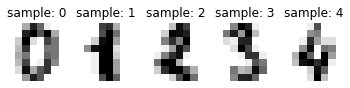

In [31]:
images_and_labels = list(zip(digits.images, digits.target))
for idx, (image, label) in enumerate(images_and_labels[:5]):
    plt.subplot(2, 5, idx + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' %label)

In [32]:
for i in range(5):
    print(i, '번 인덱스 샘플의 레이블 : ', digits.target[i])

0 번 인덱스 샘플의 레이블 :  0
1 번 인덱스 샘플의 레이블 :  1
2 번 인덱스 샘플의 레이블 :  2
3 번 인덱스 샘플의 레이블 :  3
4 번 인덱스 샘플의 레이블 :  4


In [33]:
print(digits.data[0])

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [34]:
X = digits.data
Y = digits.target

In [35]:
import torch
import torch.nn as nn
from torch import optim

In [37]:
model = nn.Sequential(
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, 16),
    nn.ReLU(),
    nn.Linear(16, 10)
)

In [38]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [39]:
loss_fn = nn.CrossEntropyLoss()

In [40]:
optimizer = optim.Adam(model.parameters())

In [41]:
losses = []

In [44]:
for epoch in range(101):
    optimizer.zero_grad()
    y_pred = model(X)
    loss = loss_fn(y_pred, Y)
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

    losses.append(loss.item())

Epoch    0/100 Cost: 2.570174
Epoch   10/100 Cost: 2.092407
Epoch   20/100 Cost: 1.755328
Epoch   30/100 Cost: 1.411327
Epoch   40/100 Cost: 1.085276
Epoch   50/100 Cost: 0.790269
Epoch   60/100 Cost: 0.567966
Epoch   70/100 Cost: 0.417588
Epoch   80/100 Cost: 0.321636
Epoch   90/100 Cost: 0.256938
Epoch  100/100 Cost: 0.211646


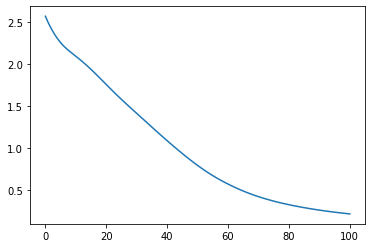

In [45]:
plt.plot(losses)

# 다층 퍼셉트론으로 MNIST 분류하기